#  TODO Plotly Sunburst plots with Dimensions data

* https://plotly.com/python/sunburst-charts/ walkthrough guide
* https://plotly.com/python-api-reference/generated/plotly.express.sunburst.html#plotly.express.sunburst full docs

In [1]:
import os
import sys
import time
import json
import pandas as pd
from pandas import json_normalize
from tqdm.notebook import tqdm as progress
import plotly.express as px
from plotly.offline import plot
if not 'google.colab' in sys.modules:
  # make js dependecies local / needed by html exports 
  from plotly.offline import init_notebook_mode
  init_notebook_mode(connected=True)
#
import dimcli
from dimcli.shortcuts import *
#
dimcli.login()
dsl = dimcli.Dsl()

DimCli v0.6.7.2 - Succesfully connected to <https://app.dimensions.ai> (method: dsl.ini file)


### Testing out plotly_express with DSL data

In [10]:
q = """search publications for "malaria" where research_org_country_names="Italy" and year < 2010 return publications[basics] limit 500"""
data = dslquery(q)

Returned Publications: 500 (total = 4325)
WARNINGS [1]
Field 'author_affiliations' is deprecated in favor of authors. Please refer to https://docs.dimensions.ai/dsl/releasenotes.html for more details


In [37]:
df = data.as_dataframe()
df = df.fillna("")
df.head(5)


### Basic  Charts

...

### Testing out plotly_express with DSL data

We can generate some hiearchical data using geographical data

In [2]:
res = dslquery("""search publications 
            for "malaria" 
            where research_org_country_names="Italy" and year < 2010 
            return publications[basics] limit 500""")
df = res.as_dataframe_authors_affiliations()
df = df.fillna("")
df.head(5)

Returned Publications: 500 (total = 4338)
WARNINGS [1]
Field 'author_affiliations' is deprecated in favor of authors. Please refer to https://docs.dimensions.ai/dsl/releasenotes.html for more details


aff_id                      aff_name aff_city  aff_city_id  \
0  grid.416651.1  Istituto Superiore di Sanità     Rome  3.16907e+06   
1  grid.416651.1  Istituto Superiore di Sanità     Rome  3.16907e+06   
2  grid.416651.1  Istituto Superiore di Sanità     Rome  3.16907e+06   
3  grid.416651.1  Istituto Superiore di Sanità     Rome  3.16907e+06   
4    grid.7445.2       Imperial College London   London  2.64374e+06   

      aff_country aff_country_code aff_state aff_state_code          pub_id  \
0           Italy               IT                           pub.1032403232   
1           Italy               IT                           pub.1032403232   
2           Italy               IT                           pub.1032403232   
3           Italy               IT                           pub.1032403232   
4  United Kingdom               GB                           pub.1052568629   

       researcher_id first_name last_name  
0  ur.01364745012.11  Francesco  Severini  
1   ur.0752630273.46    Luciano      Toma  
2   ur.0727445147.51      Marco   Di Luca  
3   ur.0652742326.39    Roberto      Romi  
4  ur.01171100243.77   David W.    Rogers

First let's remove ambiguous data that can't be counted correctly

#### Also we need a numeric field to construct the rectangle sizes

The treemap uses this value to sum up all appearances of the selected hierarchy-levels. 

In [3]:
df = df[df['aff_id'] != ''].copy()
df['tot_researchers'] = df.groupby("aff_id")["researcher_id"].transform("count")

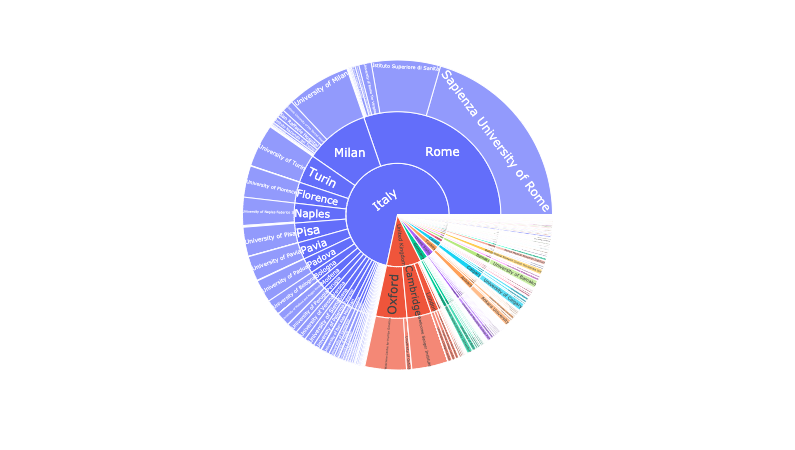

In [4]:
px.sunburst(
    df, 
    path=['aff_country', 'aff_city', 'aff_name'], 
    values='tot_researchers',
    hover_data=['aff_id']
)